In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
%matplotlib inline

In [75]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [76]:
training_set = pd.read_csv('advertising.csv')

In [77]:
training_set.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [78]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [79]:
training_set.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

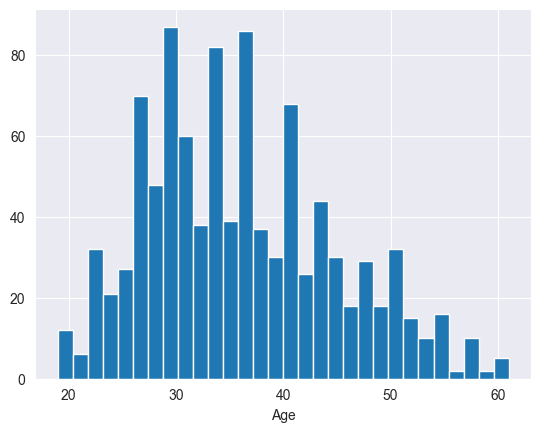

In [80]:
sns.set_style('darkgrid')
training_set['Age'].hist(bins=30)
plt.xlabel('Age')

<Axes: xlabel='Age', ylabel='Count'>

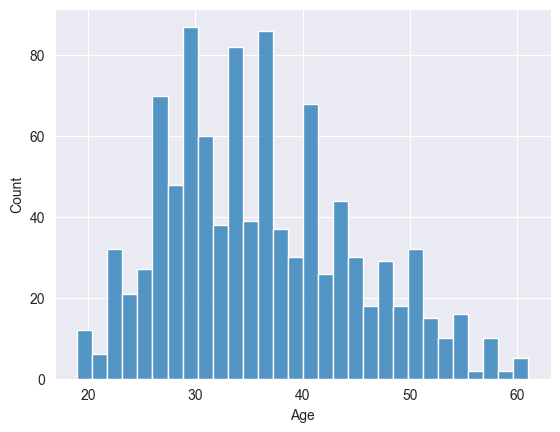

In [81]:
sns.histplot(data=training_set, x='Age', bins=30)

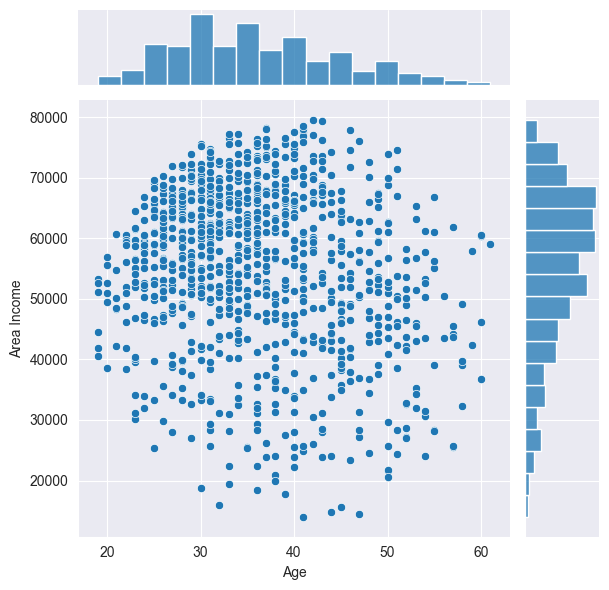

In [82]:
sns.jointplot(data=training_set, x='Age', y='Area Income')

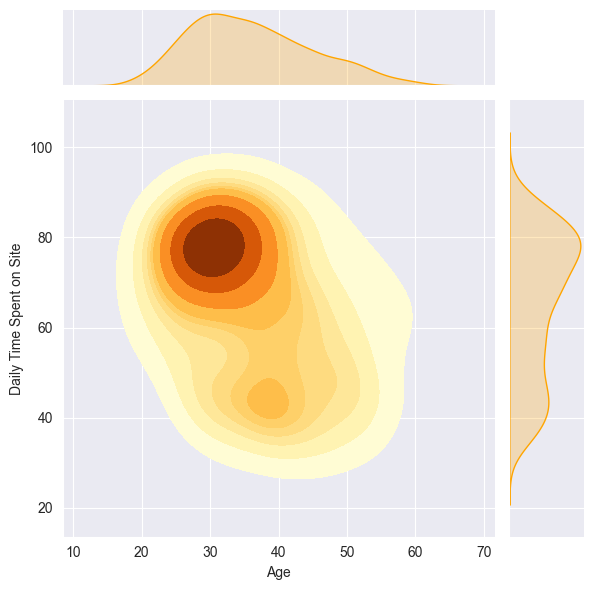

In [83]:
sns.jointplot(data=training_set, x='Age', y='Daily Time Spent on Site', kind='kde', fill=True, cmap='YlOrBr', bw=0.4, marginal_kws=dict(fill=True, color="orange"))

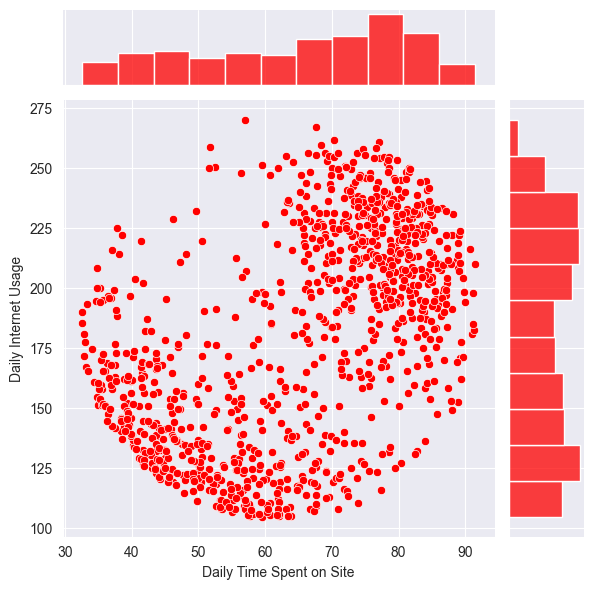

In [84]:
sns.jointplot(data=training_set, x='Daily Time Spent on Site', y='Daily Internet Usage',kind='scatter', color='red')

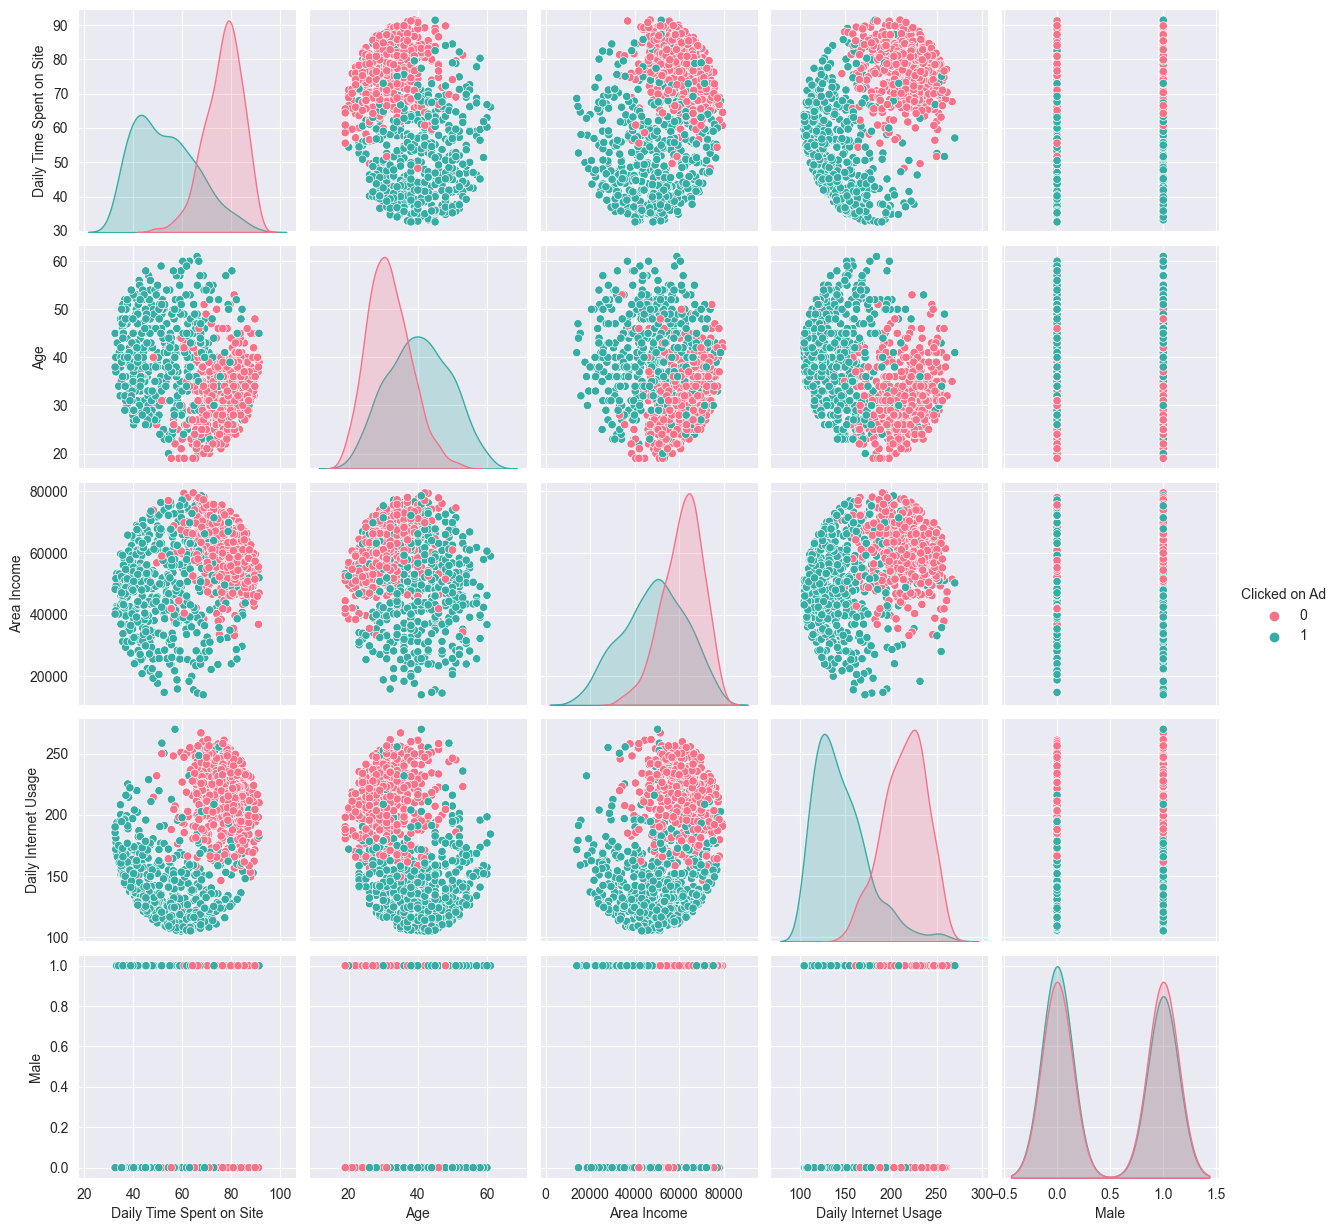

In [85]:
sns.pairplot(training_set, hue='Clicked on Ad', palette='husl')

In [86]:
training_set.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)

In [87]:
training_set.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = training_set[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = training_set['Clicked on Ad']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(training_set.drop('Clicked on Ad', axis=1), 
                                                    training_set['Clicked on Ad'], 
                                                    test_size=0.35, 
                                                    random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lrm = LogisticRegression()

In [93]:
lrm.fit(X_train, y_train)

LogisticRegression()

In [94]:
predictions = lrm.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       174
           1       0.94      0.90      0.92       176

    accuracy                           0.92       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.92      0.92      0.92       350

